## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single datase
combined_data = pd.merge(mouse_metadata, study_results)
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_data.rename(columns={'Tumor Volume (mm3)':'Volume'}, inplace=True)
#print(combined_data.columns)

drug_regimen = combined_data.groupby("Drug Regimen")
drug_regimen.count()                     

drug_regimen_df= pd.DataFrame({
    "Volume Mean":drug_regimen.Volume.mean(),
    "Volume Median":drug_regimen.Volume.median(),
    "Volume Variance":drug_regimen.Volume.var(),
    "Volume Standard Deviation":drug_regimen.Volume.std()},drug_regimen.count().index)
drug_regimen_df


,Volume Mean,Volume Median,Volume Variance,Volume Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar plots

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas


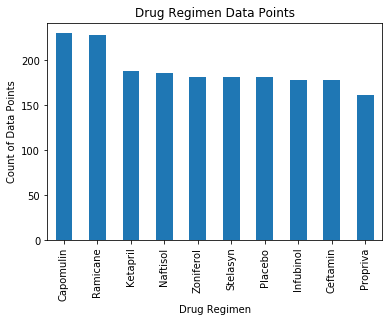

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

data_points = drug_regimen["Volume"].count()
data_points_sort = data_points.sort_values(ascending=False)

##data_points.sort_values('Drug Regimen', ascending=False)

data_points_bar = data_points_sort.plot(kind="bar", title= "Drug Regimen Data Points")
data_points_bar.set_xlabel("Drug Regimen")
data_points_bar.set_ylabel("Count of Data Points")

plt.show()





## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

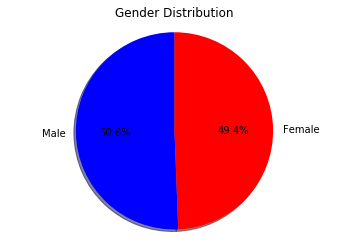

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drug_regimen = combined_data.groupby("Sex")
gender_distribution = drug_regimen["Sex"].count()
gender_distribution

sex = ["Male", "Female"]
members = [958, 935]
colors = ["blue", "red"]
#explode = (0, 0, 0, 0)

plt.title("Gender Distribution")
plt.pie(members, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
 # Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
combined_data.rename(columns={'Drug Regimen':'Regimen'}, inplace=True)
value_list = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol']
#Grab DataFrame rows where column has certain values
combined_data_rev = combined_data[combined_data.Regimen.isin(value_list)]
combined_data_rev
    
top_regimen = combined_data_rev.groupby(["Mouse ID", "Regimen"]).tail(1).sort_values(by=["Mouse ID"], ascending=True)
top_regimen.head(12)

quartiles = top_regimen['Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Volume is: {lowerq}")
print(f"The upper quartile of Volume is: {upperq}")
print(f"The interquartile range of Volume is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Volume is: 37.2898392225
The upper quartile of Volume is: 63.359064942500005
The interquartile range of Volume is: 26.069225720000006
The the median of occupancy is: 45.0 
Values below -1.813999357500009 could be outliers.
Values above 102.46290352250001 could be outliers.


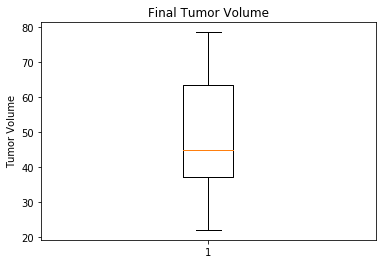

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_regimen.head(12)
top_regimen_boxplt = top_regimen["Volume"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(top_regimen_boxplt)
plt.show()


## Line and scatter plots

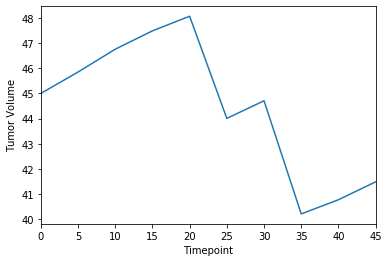

In [43]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combined_data_rev
capomulin_data = combined_data_rev.loc[combined_data_rev["Regimen"]== 'Capomulin']
vol_timept = capomulin_data.loc[capomulin_data["Mouse ID"]=="l509"].set_index("Timepoint").Volume
vol_timept.plot().set_ylabel("Tumor Volume")
plt.show()

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combined_data_rev
capomulin_data = combined_data_rev.loc[combined_data_rev["Regimen"]== 'Capomulin']
capomulin_data
capomulin_data_rev = capomulin_data[["Mouse ID", "Regimen", "Timepoint", "Volume"]]
capomulin_data_rev
capomulin_data_grpby = capomulin_data_rev.groupby("Mouse ID")
capomulin_data_grpby

# a=np.arrange(capomulin_data_grpby.ngroups)
# np.random.shuffle(a)

# df[g.ngroup().isin(a[:2])
   
# timepoint_list = capomulin_data_rev["Timepoint"]
# timepoint_list

# timepoint_list = capomulin_data_rev.Timepoint.unique()
# timepoint_list

# volume_data = capomulin_data_rev["Volume"]
# volume_data_short = volume_data.head(10)
# volume_data_short

# plt.plot(timepoint_list, volume_data_short)
# plt.show()

# g = df.groupby(['col1', 'col2'])

# a=np.arange(g.ngroups)
# np.random.shuffle(a)

# df[g.ngroup().isin(a[:2])

# mouse_id = input("What mouse would you like to review?")
# Volume_over_time = capomulin_data_rev.loc[mouse_id,["Timepoint"]]
# volume_over_time

# df.name.unique()


# # Collect the user's input to search through our data frame
# wrestler_name = input("What wrestler's career would you like to look at?")

# # Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
# wins_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Wins","2014 Wins", "2015 Wins", "2016 Wins"]]

# # Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016
# losses_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Losses","2014 Losses",
#                                                             "2015 Losses", "2016 Losses"]]

In [68]:
cmbD=combined_data.loc[combined_data.Regimen=="Capomulin"]
cmbD.groupby("Mouse ID").mean().plot(kind="scatter","Weight (g)", "Volume")
# cmbD.groupby(["Mouse ID", ""]).Volume.mean()




SyntaxError: positional argument follows keyword argument (<ipython-input-68-6a4f55655cbc>, line 2)

In [47]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# mice_group = combined_data.groupby("Mouse ID")[]
# mice_group


In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen